# Notebook 1 - EDA
### Hugo C Marrochio
### Date: Nov 1 2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import yfinance as yf
import seaborn as sns
import plotly.graph_objects as go
import random
import plotly.express as px

plt.rcParams['figure.figsize'] = (8.0, 6.0) #setting figure size

In [2]:
#Set random seed, define a function so we don't need to recall later in the notebook
def set_global_seed(seed=10):
    random.seed(seed)
    np.random.seed(seed)


# Call the function
set_global_seed()

## Summary of EDA - Notebook 1

In this notebook, I will cover some basic EDA about S&P500 data from kaggle (https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks). The dataset consists of daily stock market information for the top 500 companies listed trading in the United States. It cointains daily information from 2010 to October 2024, for every day stocks were traded. Refer to the __readme__ file for a a bit more information about the dataset. I will also uncover some properties along this notebook. 

For readability, I separated the EDA analysis into 3 parts: Notebook 1 and Notebook 2, as well as a python script with auxiliary functions. Notebook 1 has the manipulation of the essentials of the dataset, while Notebook 2 we analyze correlation matrices and their eigenvalue distributions.

### Notebook 1

#### Part 1 - A Quick Analysis on Companies


    - Load the data!
    - Investigate properties of companies of S&P500.
    - Investigate companies by market capital percentage.
    - Conclude that only a few companies are responsible for most of the market capital weight.

#### Part 2 - Null Values and Empty Periods

    - Null values can be real in our dataset: a stock is not going to have data to the past of its creation!
    - 430 stocks out of 503 have no null value in the period analyzed (~85%).
    - At least for the scope of this project, we can focus on stocks that does not have null values.

#### Part 3 - Return and Visualization for 1 Example

    - Calculate daily Return and Log-Return, the main object of study of this project. 
    - Show visuals for the Return for 1 stock, not a clear pattern and tendency. 

#### Part 4 - Selecting a Few Different Groupings

    - We separate the data into 2 different subgroups: Selecting top N companies by their market capital weight, and just selecting N randomly from the 503 companies. Then we slice them for N=30, 60 and 100. We also make sure that these stocks do not have any null values after 2013.
    - We clean for columns we will not use in our analysis and export these dataframes to .csv files. We will load these into notebook 2. 

We continue the analysis in Notebook 2!

## Part 1 - A quick analysis on _Companies_

First let us load two of the csv files of our dataset, originally obtained from (https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks)

In [3]:
df=pd.read_csv('data/sp500_stocks.csv')

df_companies=pd.read_csv('data/sp500_companies.csv')

We should transform the `Date` column into datetime object

In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873675 entries, 0 to 1873674
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date       datetime64[ns]
 1   Symbol     object        
 2   Adj Close  float64       
 3   Close      float64       
 4   High       float64       
 5   Low        float64       
 6   Open       float64       
 7   Volume     float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 114.4+ MB


Here we want to show a few interesting information we can obtain from the file _sp500_companies.csv_

In [6]:
df_companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,236.48,3595465654272,1.317810e+11,0.049,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.065970
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,143.71,3525206343680,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.064681
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,418.78,3112808480768,1.294330e+11,0.152,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.057115
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,165.80,2029989003264,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.037247
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,164.07,2028840550400,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.037226


Great, there is information about the sector and industry, and there is another index that should be relevant to us, `Weight`. Each index
is relates to Market Capitalization, which takes into account the price of the stock as well the outstanding shares. We can therefore classify the importance in the S&P market place by looking into the `Weight` ranking.


Let us multiply the column `Weight` by 100 so it represents a percentage

In [7]:
df_companies['Weight']=100*df_companies['Weight']

In [8]:
#Confirm that Weight sums to 100 up to numerical error
df_companies['Weight'].sum()

99.99999999999747

What are the top 10 stocks by `Weight`?

In [9]:
df_companies.sort_values(by=['Weight'],ascending=False).head(10)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,236.48,3595465654272,1.317810e+11,0.049,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",6.597042
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,143.71,3525206343680,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,6.468129
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,418.78,3112808480768,1.294330e+11,0.152,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,5.711452
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,165.80,2029989003264,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,3.724670
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,164.07,2028840550400,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,3.722563
5,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,189.07,1984403079168,1.040490e+11,0.101,Seattle,WA,United States,1525000.0,"Amazon.com, Inc. engages in the retail sale of...",3.641028
6,NMS,META,"Meta Platforms, Inc.","Meta Platforms, Inc.",Communication Services,Internet Content & Information,575.16,1455051112448,7.477400e+10,0.221,Menlo Park,CA,United States,70799.0,"Meta Platforms, Inc. engages in the developmen...",2.669761
7,NYQ,BRK-B,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.,Financial Services,Insurance - Diversified,464.16,1001002827776,1.000900e+11,0.012,Omaha,NE,United States,396500.0,"Berkshire Hathaway Inc., through its subsidiar...",1.836663
8,NMS,AVGO,Broadcom Inc.,Broadcom Inc.,Technology,Semiconductors,179.99,840657731584,2.295800e+10,0.164,Palo Alto,CA,United States,20000.0,"Broadcom Inc. designs, develops, and supplies ...",1.542458
9,NYQ,LLY,Eli Lilly and Company,Eli Lilly and Company,Healthcare,Drug Manufacturers - General,906.13,815903014912,1.550190e+10,0.360,Indianapolis,IN,United States,43000.0,"Eli Lilly and Company discovers, develops, and...",1.497037


In fact, we see that tehcnology as a sector is definitely a big share of the stocks traded. We can confirm whether this holds for all the data by a simple groupby

In [10]:
df_companies.groupby('Sector')['Weight'].sum().sort_values(ascending=False)

Sector
Technology                31.164122
Communication Services    12.934308
Financial Services        12.751558
Healthcare                10.550731
Consumer Cyclical          9.873168
Industrials                7.155686
Consumer Defensive         5.966061
Energy                     3.152529
Utilities                  2.446282
Real Estate                2.161431
Basic Materials            1.844125
Name: Weight, dtype: float64

Technology represents ~31% by Market weight!

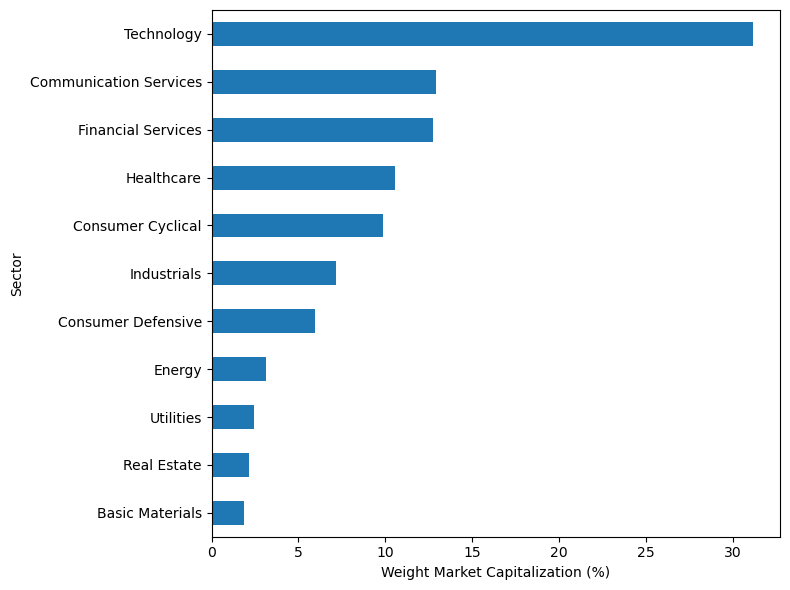

In [11]:
df_companies.groupby('Sector')['Weight'].sum().sort_values().plot(kind='barh')
plt.xlabel('Weight Market Capitalization (%)')
plt.tight_layout()
plt.savefig('figures/Sector_plot.png')
plt.show()

We can also show a histogram of the weights

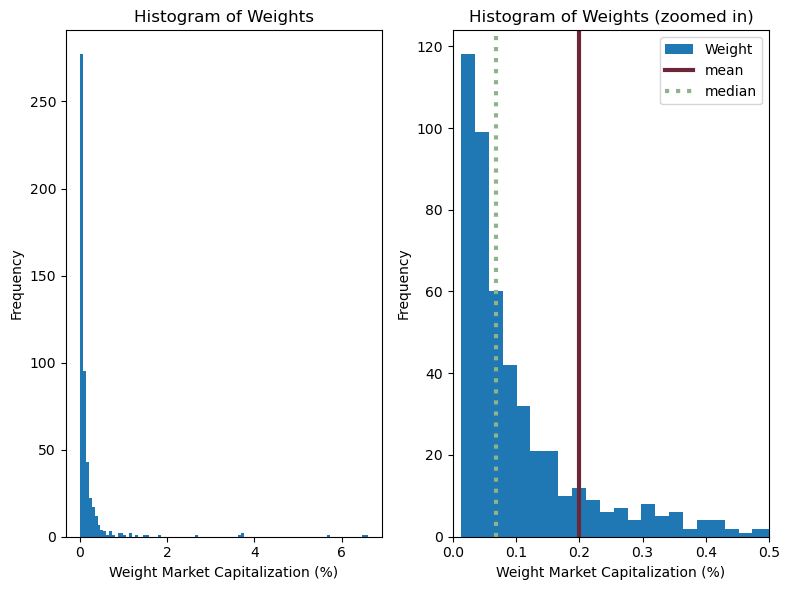

In [12]:
plt.subplots(1,2)

plt.subplot(1,2,1)
df_companies['Weight'].plot(kind='hist',bins=100)
plt.xlabel('Weight Market Capitalization (%)')
#plt.axvline(df_companies['Weight'].mean(), c='#6b2737', label='mean',lw=3)
#plt.axvline(df_companies['Weight'].median(), c='#8db38b', label='median',lw=3,ls='dotted')
plt.title('Histogram of Weights')

plt.subplot(1,2,2)
df_companies['Weight'].plot(kind='hist',bins=300)
plt.xlabel('Weight Market Capitalization (%)')
plt.axvline(df_companies['Weight'].mean(), c='#6b2737', label='mean',lw=3)
plt.axvline(df_companies['Weight'].median(), c='#8db38b', label='median',lw=3,ls='dotted')
plt.xlim([0,0.5])
plt.title('Histogram of Weights (zoomed in)')
plt.legend()


plt.tight_layout()
plt.savefig('figures/Weight_Histograms.png')
plt.show()

We can definitely see a few companies dominate the market exchange! Notice how the median is much smaller than the maximum value of ~6.6% (about 100 times smaller!)

Since our overall goal will be to analyze which stocks cluster together and if there is a good strategy given a certain amount of risk, it is good to keep in mind the properies we already have of the stocks analyzed.

## Part 2 - Null Values and empty periods

If we include all 503 stock in our analysis, there will be inevitably null values. Notice that this is independent from the quality of the data source: before a certain date, some stocks simply did not exist!

Here I want to take an approach to create a dataframe with a dictionary for the amount of null values, as well as when the real data starts for that stock

In [13]:
df['Date'].describe()

count                          1873675
mean     2017-05-27 08:20:37.046979840
min                2010-01-04 00:00:00
25%                2013-09-16 00:00:00
50%                2017-05-26 00:00:00
75%                2021-02-08 00:00:00
max                2024-10-21 00:00:00
Name: Date, dtype: object

Notice that our data set starts at `2010-01-04` and final `2024-10-21` (when I downloaded the data for truncation and consistency)

Here we create a list with all the `Symbol` elements

In [14]:
list_all=df['Symbol'].unique().tolist()
len(list_all)

503

503, as expected!

We can now create extra lists, with the information of the amount of null values per stock, as well as when the real data starts.

In [15]:
# Takes a minute to run
list_NAN=[]
list_NAN_end=[]
for col in list_all:
    #Calculate the amount of null values per stock
    amount_null=df[df['Symbol']==col].isna().sum()['Adj Close']
    list_NAN.append(amount_null)

    # We also want to store the data when Null values end (and real data starts). use the format YYYY-MM-DD
    if amount_null!=0:
        df_temp=df[df['Symbol']==col]

        #filter only null values
        df_temp=df_temp[df_temp.isnull()['Adj Close']]

        date_NAN_end=df_temp['Date'].max().strftime('%Y-%m-%d')
        list_NAN_end.append(date_NAN_end)
        #df[df['Symbol']==col]=dt.strftime('%Y-%m-%d')
    else:
        # This is the case for no null value, the data starts at the earliest date
        df_temp=df[df['Symbol']==col]
        date_NAN_end='2010-01-04'
        list_NAN_end.append(date_NAN_end)      

Ok so now we can define a DataFrame with the information we collected!

In [16]:
data_null = {
    'Symbol': list_all,
    'Null number': list_NAN,
    'Date Data Starts':list_NAN_end}

# Convert into pandas DataFrame
df_null = pd.DataFrame(data_null)

If we markdown the loop, we can just read from the data file with

In [40]:
#df_null=pd.read_csv('data/sp500_null.csv')

Let us export to .csv, so we do not need to re-run the for loop in the cell

In [17]:
df_null.to_csv('data/sp500_null.csv', index=False)

In [18]:
df_null['Date Data Starts']=pd.to_datetime(df_null['Date Data Starts'])

So for instance, if I want to check what is the maximum amount stocks I can analyze in a certain period, without further analysis for the null values, we can just check a simple condition. So if we want stock data for 2015-2024, we can run the following cell

In [19]:
df_null[df_null['Date Data Starts']<'2015-01-01'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 0 to 502
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Symbol            471 non-null    object        
 1   Null number       471 non-null    int64         
 2   Date Data Starts  471 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 14.7+ KB


Therefore, there would be 471 out of 503 stocks where we do not need to do any further analysis regarding null values! At least for now, __this is the philosophy we will follow for the data analysis.__

We can show in a simple histogram (by year) of how many stock has data starting that year. We can see that the majority of it starts in 2010.

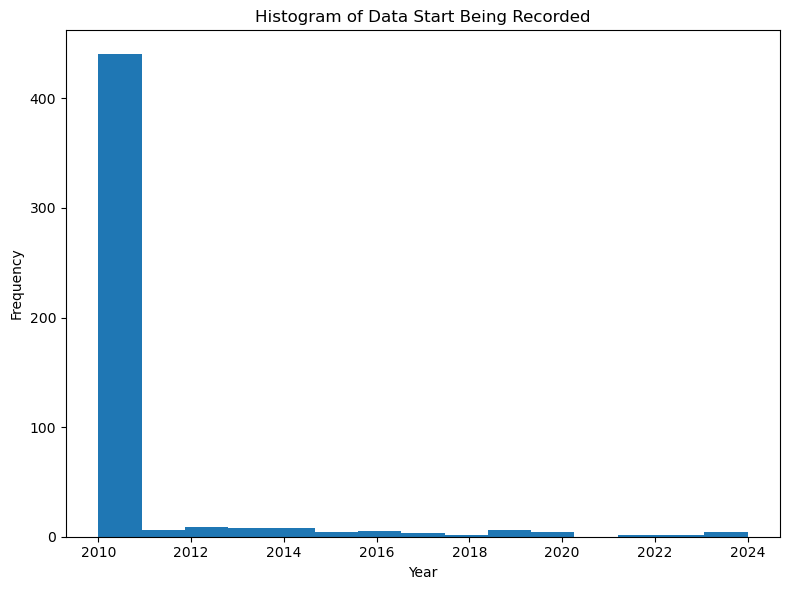

In [20]:
df_null['Date Data Starts'].dt.year.plot(kind='hist',bins=15)
plt.xlabel('Year')
plt.title('Histogram of Data Start Being Recorded')
plt.tight_layout()
plt.savefig('figures/nullstarts.png')
plt.show()

How many stocks do __not__ have any null values?

In [21]:
val_1=df_null[df_null['Null number']==0].shape[0]
perc_1=round(100*df_null[df_null['Null number']==0].shape[0]/df_null.shape[0],2)
print(f'There are {val_1} stocks without null value, or about {perc_1} % of the data')

There are 430 stocks without null value, or about 85.49 % of the data


So even if we want to analyze all the 14 years of available data, we would have 430 stocks! 

## Part 3 - Return and visualization for 1 example

We will focus on one example in this section, but the lessons here will be used for the rest of the analysis. Let us create a dataframe with only the information from Apple stocks

In [22]:
df_Apple=df[df['Symbol']=='AAPL'].reset_index(drop=True)

Now we want to calculate two quantities that are relevant to model the mathematical behavior of stocks. We define the two quantities as

- __Return:__ $R_t \equiv \frac{P_{t} - P_{t-1}}{P_{t-1}} $,

- __Log-Return:__ $ R^{\text{log}}_t \equiv \log \left( \frac{P_{t}}{P_{t-1}} \right) $,

  where $P_t$ is the stock price at time $t$.

We will use the adjusted price column of the dataset in order to calculate return and log-return. The adjusted price, by the data description, takes into account company actions, such as paying dividends as well as stock splits. It should lead to a more consistent long term analysis of the stock price.

We can calculate the return using a date lag.

In [23]:
df_Apple['AdjClose_prev']=df_Apple['Adj Close'].shift(1)

In [24]:
# calculate return and log-return using the lag
df_Apple['Return']=(df_Apple['Adj Close']-df_Apple['AdjClose_prev'])/df_Apple['AdjClose_prev']
df_Apple['Log_Return']=np.log(df_Apple['Adj Close']/df_Apple['AdjClose_prev'])

In [25]:
#Due to lag calculation, the first value of course is null. We can simply drop it
df_Apple.isna().sum()

Date             0
Symbol           0
Adj Close        0
Close            0
High             0
Low              0
Open             0
Volume           0
AdjClose_prev    1
Return           1
Log_Return       1
dtype: int64

In [26]:
df_Apple= df_Apple.dropna(axis=0)
df_Apple.isna().sum()

Date             0
Symbol           0
Adj Close        0
Close            0
High             0
Low              0
Open             0
Volume           0
AdjClose_prev    0
Return           0
Log_Return       0
dtype: int64

No null values, sanity check!

Let us show what the time series for the return looks for the Apple Stock. As we will see, there are some trends but very hard to predict by eye, we will have to use some interesting mathematical tools to help us with our analysis.

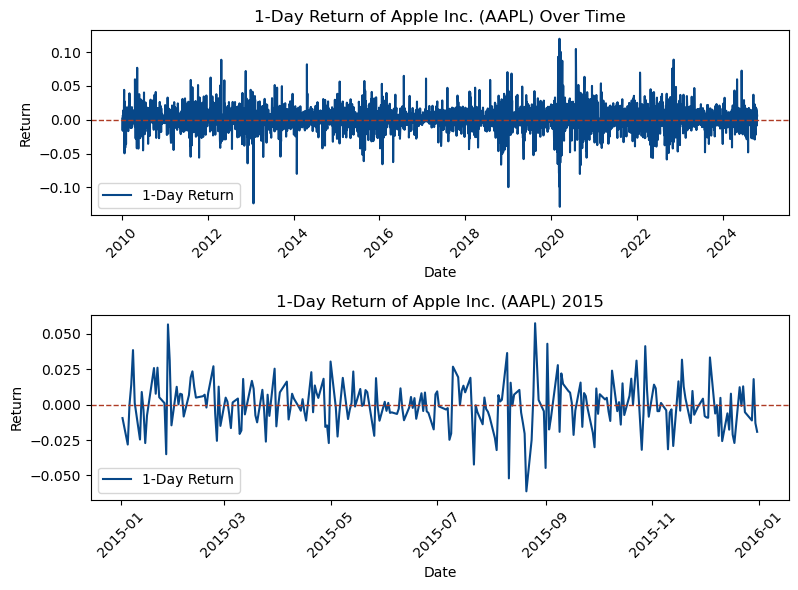

In [27]:
plt.subplots(2,1)

plt.subplot(2,1,1)
plt.plot(df_Apple['Date'], df_Apple['Return'], label='1-Day Return', color='#074788')
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('1-Day Return of Apple Inc. (AAPL) Over Time')
plt.axhline(0, color='#AE3B24', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.xticks(rotation=45)
plt.legend()

plt.subplot(2,1,2)
plt.plot(df_Apple[df_Apple['Date'].dt.year==2015]['Date'], df_Apple[df_Apple['Date'].dt.year==2015]['Return'], label='1-Day Return', color='#074788')
plt.xlabel('Date')
plt.ylabel('Return')
plt.xlim=([2015-2016])
plt.title('1-Day Return of Apple Inc. (AAPL) 2015')
plt.axhline(0, color='#AE3B24', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.xticks(rotation=45)
plt.legend()


plt.tight_layout()
plt.savefig('figures/Apple_return.png')


plt.show()

Notice that there are certain peaks that seem to be a bit higher and have more structure than just completely random data. For completeness, we will also show the Log-returns

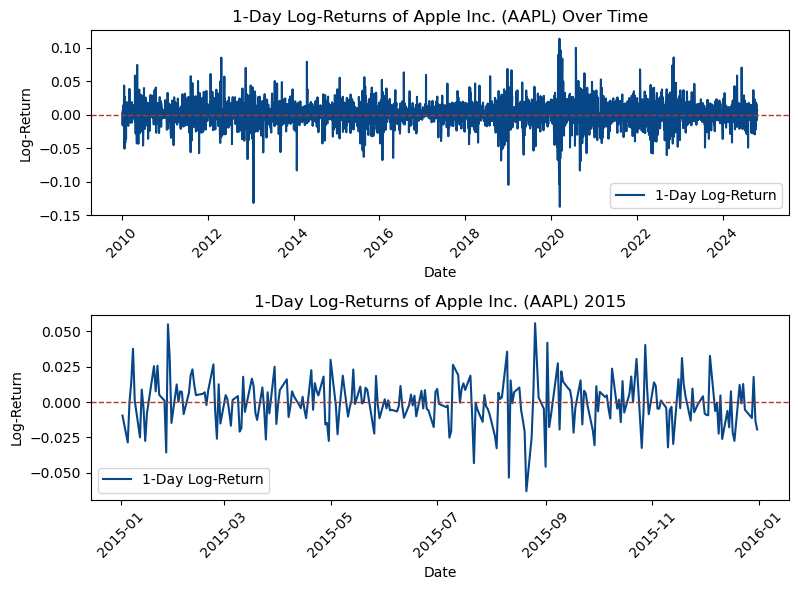

In [28]:
plt.subplots(2,1)

plt.subplot(2,1,1)
plt.plot(df_Apple['Date'], df_Apple['Log_Return'], label='1-Day Log-Return', color='#074788')
plt.xlabel('Date')
plt.ylabel('Log-Return')
plt.title('1-Day Log-Returns of Apple Inc. (AAPL) Over Time')
plt.axhline(0, color='#AE3B24', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.xticks(rotation=45)
plt.legend()

plt.subplot(2,1,2)
plt.plot(df_Apple[df_Apple['Date'].dt.year==2015]['Date'], df_Apple[df_Apple['Date'].dt.year==2015]['Log_Return'], label='1-Day Log-Return', color='#074788')
plt.xlabel('Date')
plt.ylabel('Log-Return')
plt.xlim=([2015-2016])
plt.title('1-Day Log-Returns of Apple Inc. (AAPL) 2015')
plt.axhline(0, color='#AE3B24', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.xticks(rotation=45)
plt.legend()


plt.tight_layout()
plt.show()

At least for now, we will not worry much about forecasting the time series. I will first focus on obtaining good data about stock clustering by analyzing correlation structures.  

## Part 4 - Selecting a few different groupings

#### Selecting top stocks by weight

A natural point to start grouping our data is by restricting to only the top n stocks by weight. For now, I will focus on stocks that do not contain null values __after 2014__, and after filtering by this date range, we will analyze the __top 30, 60 and 100 stocks__.

Let us first generate an ordered list by weight, with 100 stocks that do not have null value after 2014

In [29]:
list_index_top100=[]
for item in df_companies.sort_values(by=['Weight'],ascending=False).head(140)['Symbol']:
    # First let us test if the column has data since 2014
    if df_null[df_null['Symbol']==item]['Date Data Starts'].dt.year.iloc[0]<2014:
        list_index_top100.append(item)
    # We only need the first 100, so break once our list size is reached
    if len(list_index_top100)==100:
        break

In [30]:
# We can simply slice for the top30 and top60
list_index_top30=list_index_top100[:30]
list_index_top60=list_index_top100[:60]

#### Selecting stocks randomly

What if we want to randomly pick a subset of the stocks? We can use the random python functions to generate such list

In [31]:
#print a bit more as I want to generate 100 stocks
random_list_num_no_replacement = random.sample(range(502+1), 140)

In [32]:
list_random_100=[]
for num in random_list_num_no_replacement:
    if df_null.iloc[num]['Date Data Starts'].year<2014 and len(list_random_100)<100:
        list_random_100.append(df_null.iloc[num]['Symbol'])

In [33]:
# Sanity check: Do we have 100
len(list_random_100)

100

In [34]:
#Slice for 30 and 60 random indexes
list_random_30=list_random_100[:30]
list_random_60=list_random_100[:60]

Great! We are ready to evaluate some correlation functions!  

In order to keep a record, I will export 6 separate csv files with data from 2014 to 2024, and with the 6 selection criteria we discussed.

In [35]:
df_top_100=df[df['Symbol'].isin(list_index_top100)].reset_index(drop=True)
df_top_60=df[df['Symbol'].isin(list_index_top60)].reset_index(drop=True)
df_top_30=df[df['Symbol'].isin(list_index_top30)].reset_index(drop=True)
df_random_100=df[df['Symbol'].isin(list_random_100)].reset_index(drop=True)
df_random_60=df[df['Symbol'].isin(list_random_60)].reset_index(drop=True)
df_random_30=df[df['Symbol'].isin(list_random_30)].reset_index(drop=True)

For our analysis, we will only focus on `Date`, `Symbol`, `Adj Close`, `Return`, `Log-Return`

In [36]:
list_of_df=[df_top_100,df_top_60,df_top_30,df_random_100,df_random_60,df_random_30]

In [37]:
for df_item in list_of_df:
    df_item['AdjClose_prev']=df_item['Adj Close'].shift(1)
    df_item['Return']=(df_item['Adj Close']-df_item['AdjClose_prev'])/df_item['AdjClose_prev']
    df_item['Log_Return']=np.log(df_item['Adj Close']/df_item['AdjClose_prev'])
    df_item= df_item.dropna(axis=0)
    df_item = df_item.drop(['Close', 'High','Low','Open','Volume','AdjClose_prev'], axis=1)    

In [38]:
#Drop null
df_top_100=df_top_100.dropna(axis=0)
df_top_60=df_top_60.dropna(axis=0)
df_top_30=df_top_30.dropna(axis=0)
df_random_100=df_random_100.dropna(axis=0)
df_random_60=df_random_60.dropna(axis=0)
df_random_30=df_random_30.dropna(axis=0)
#Drop columns we will not use for now in the analysis
df_top_100=df_top_100.drop(['Close', 'High','Low','Open','Volume','AdjClose_prev'], axis=1)  
df_top_60=df_top_60.drop(['Close', 'High','Low','Open','Volume','AdjClose_prev'], axis=1)  
df_top_30=df_top_30.drop(['Close', 'High','Low','Open','Volume','AdjClose_prev'], axis=1)  
df_random_100=df_random_100.drop(['Close', 'High','Low','Open','Volume','AdjClose_prev'], axis=1)  
df_random_60=df_random_60.drop(['Close', 'High','Low','Open','Volume','AdjClose_prev'], axis=1)  
df_random_30=df_random_30.drop(['Close', 'High','Low','Open','Volume','AdjClose_prev'], axis=1)  

Export to csv, I will keep it in markdown, but we can change it in order to produce the csv files

In [39]:
df_top_100.to_csv('data/sp500_stocks_top_100.csv', index=False)
df_top_60.to_csv('data/sp500_stocks_top_60.csv', index=False)
df_top_30.to_csv('data/sp500_stocks_top_30.csv', index=False)
df_random_100.to_csv('data/sp500_stocks_random_100.csv', index=False)
df_random_60.to_csv('data/sp500_stocks_random_60.csv', index=False)
df_random_30.to_csv('data/sp500_stocks_random_30.csv', index=False)

## We will continue now in a separate notebook!